In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [8]:
import pandas as pd

RATING_DATA_FILE = "ratings.csv"
MOVIE_DATA_FILE= "movies.csv"


In [9]:
mov_df = pd.read_csv(RATING_DATA_FILE)

In [10]:
mov_df.head()

,userId,movieId,rating,timestamp
0,1,296.0,5.0,1.147880e+09
1,1,306.0,3.5,1.147869e+09
2,1,307.0,5.0,1.147869e+09
3,1,665.0,5.0,1.147879e+09
4,1,899.0,3.5,1.147869e+09


In [11]:
movie_titles = pd.read_csv(MOVIE_DATA_FILE)
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
mov_df = pd.merge(mov_df, movie_titles, on='movieId')
mov_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296.0,5.0,1.147880e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306.0,3.5,1.147869e+09,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307.0,5.0,1.147869e+09,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665.0,5.0,1.147879e+09,Underground (1995),Comedy|Drama|War
4,1,899.0,3.5,1.147869e+09,Singin' in the Rain (1952),Comedy|Musical|Romance


In [13]:
mov_df.describe()

,userId,movieId,rating,timestamp
count,1.382537e+07,1.382537e+07,1.382537e+07,1.382537e+07
mean,4.495944e+04,2.152906e+04,3.532158e+00,1.215468e+09
std,2.575176e+04,3.944372e+04,1.061502e+00,2.268888e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,2.277900e+04,1.197000e+03,3.000000e+00,1.012441e+09
50%,4.486200e+04,2.950000e+03,3.500000e+00,1.196959e+09
75%,6.725900e+04,8.636000e+03,4.000000e+00,1.447282e+09
max,8.961100e+04,2.091630e+05,5.000000e+00,1.574328e+09


In [14]:
mov_df.dropna(inplace=True)
mov_df.shape

(13825366, 6)

In [15]:
ratings = pd.DataFrame(mov_df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",3.148936
#1 Cheerleader Camp (2010),1.333333
#Captured (2017),3.750000
#Female Pleasure (2018),3.750000
#FollowMe (2019),2.250000


In [16]:
ratings['number_of_ratings'] = mov_df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
"""Great Performances"" Cats (1998)",3.148936,94
#1 Cheerleader Camp (2010),1.333333,6
#Captured (2017),3.750000,2
#Female Pleasure (2018),3.750000,2
#FollowMe (2019),2.250000,4


<Axes: >

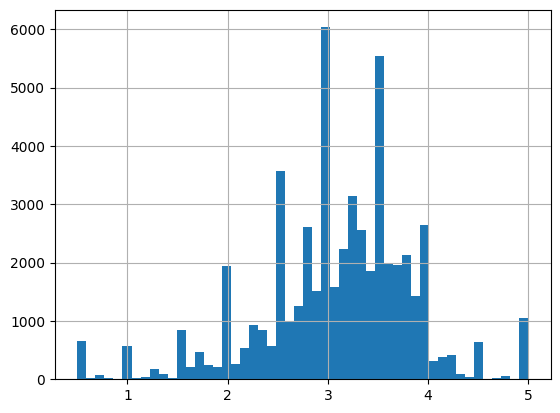

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

<Axes: >

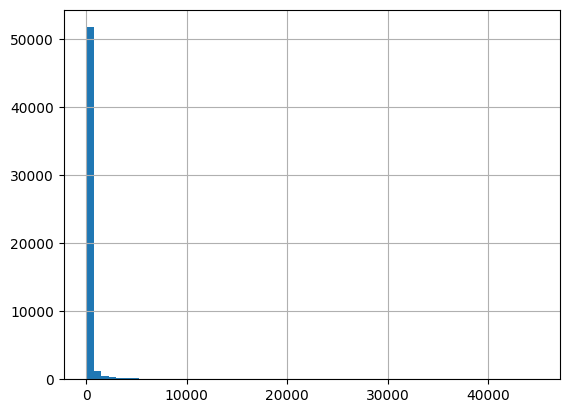

In [18]:
ratings['number_of_ratings'].hist(bins=60)

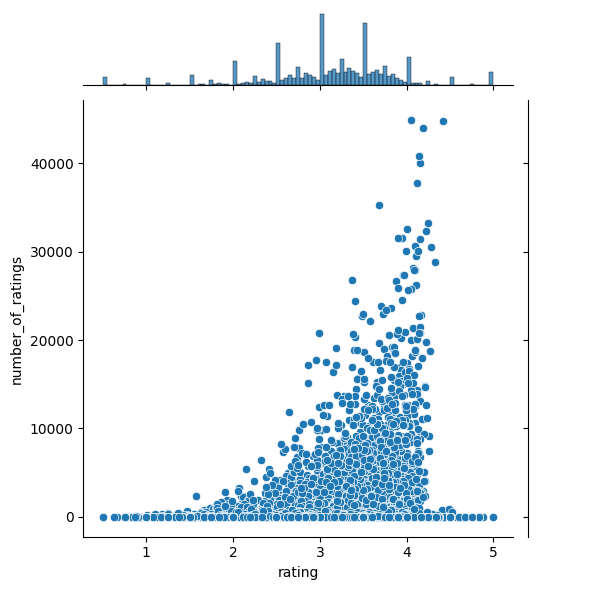

In [19]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

In [20]:
ratings.sort_values(by=['number_of_ratings'],ascending=False,inplace=True)

In [21]:
ratings.head()

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.046662,44865
"Shawshank Redemption, The (1994)",4.416074,44736
Pulp Fiction (1994),4.187750,43928
"Silence of the Lambs, The (1991)",4.147815,40774
"Matrix, The (1999)",4.151189,40036


In [22]:
top_rating = ratings[0:500]

In [23]:
top_rating

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.046662,44865
"Shawshank Redemption, The (1994)",4.416074,44736
Pulp Fiction (1994),4.187750,43928
"Silence of the Lambs, The (1991)",4.147815,40774
"Matrix, The (1999)",4.151189,40036
...,...,...
Pirates of the Caribbean: At World's End (2007),3.377945,6239
"Great Escape, The (1963)",4.113180,6229
First Knight (1995),3.082383,6227


In [24]:
mov_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296.0,5.0,1.147880e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306.0,3.5,1.147869e+09,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307.0,5.0,1.147869e+09,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665.0,5.0,1.147879e+09,Underground (1995),Comedy|Drama|War
4,1,899.0,3.5,1.147869e+09,Singin' in the Rain (1952),Comedy|Musical|Romance


In [25]:
top_rating.reset_index(inplace=True)
top_rating.head()


,title,rating,number_of_ratings
0,Forrest Gump (1994),4.046662,44865
1,"Shawshank Redemption, The (1994)",4.416074,44736
2,Pulp Fiction (1994),4.187750,43928
3,"Silence of the Lambs, The (1991)",4.147815,40774
4,"Matrix, The (1999)",4.151189,40036


In [26]:
topmovies_df = mov_df[mov_df["title"].isin(top_rating["title"])]

In [27]:
topmovies_df.shape

(6033894, 6)

In [28]:
mov_df.shape

(13825366, 6)

In [29]:
movie_matrix = topmovies_df.pivot_table(index='userId', columns='title', values='rating')

In [30]:
movie_matrix.head()

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),...,Wild Wild West (1999),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)","Wolf of Wall Street, The (2013)","X-Files: Fight the Future, The (1998)",X-Men (2000),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Zombieland (2009)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN
3,NaN,NaN,NaN,5.0,3.0,4.0,3.0,NaN,3.5,NaN,...,NaN,NaN,NaN,4.5,4.0,4.0,4.0,NaN,NaN,4.0
4,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,4.0,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
top_rating.sort_values('number_of_ratings', ascending=False).head(10)

,title,rating,number_of_ratings
0,Forrest Gump (1994),4.046662,44865
1,"Shawshank Redemption, The (1994)",4.416074,44736
2,Pulp Fiction (1994),4.187750,43928
3,"Silence of the Lambs, The (1991)",4.147815,40774
4,"Matrix, The (1999)",4.151189,40036
5,Star Wars: Episode IV - A New Hope (1977),4.121258,37713
6,Jurassic Park (1993),3.677216,35217
7,Schindler's List (1993),4.250512,33218
8,Braveheart (1995),4.004561,32562
9,Fight Club (1999),4.228458,32367


In [32]:
top_rating.sort_values('rating', ascending=False).head(10)

,title,rating,number_of_ratings
1,"Shawshank Redemption, The (1994)",4.416074,44736
18,"Godfather, The (1972)",4.331864,28804
14,"Usual Suspects, The (1995)",4.283627,30526
65,"Godfather: Part II, The (1974)",4.269758,18752
378,Seven Samurai (Shichinin no samurai) (1954),4.258407,7494
271,12 Angry Men (1957),4.253527,9145
7,Schindler's List (1993),4.250512,33218
197,Rear Window (1954),4.240292,11176
9,Fight Club (1999),4.228458,32367
55,One Flew Over the Cuckoo's Nest (1975),4.221073,19817


In [33]:
FG_user_rating = movie_matrix['Forrest Gump (1994)']

In [34]:
FG_user_rating.head()

,Forrest Gump (1994)
userId,
1,NaN
2,4.5
3,4.0
4,NaN
5,4.0


In [35]:
imilar_to_fg = movie_matrix.corrwith(FG_user_rating)

In [36]:
imilar_to_fg.sort_values(ascending=False).head()

,0
title,
Forrest Gump (1994),1.000000
"Green Mile, The (1999)",0.426715
Cast Away (2000),0.412309
Rain Man (1988),0.411971
Saving Private Ryan (1998),0.382072


In [37]:
SL_user_rating = movie_matrix['Schindler\'s List (1993)']

In [38]:
SL_user_rating.head()

,Schindler's List (1993)
userId,
1,NaN
2,5.0
3,4.0
4,NaN
5,NaN


In [39]:
similar_to_sl=movie_matrix.corrwith(SL_user_rating)

In [40]:
similar_to_sl.sort_values(ascending=False).head()

,0
title,
Schindler's List (1993),1.000000
Saving Private Ryan (1998),0.435981
"Pianist, The (2002)",0.428873
Hotel Rwanda (2004),0.390259
Philadelphia (1993),0.384038


In [41]:
corr_SL = pd.DataFrame(similar_to_sl, columns=['correlation'])
corr_SL.dropna(inplace=True)
corr_SL.head()

,correlation
title,
(500) Days of Summer (2009),0.223248
10 Things I Hate About You (1999),0.061811
12 Angry Men (1957),0.308417
2001: A Space Odyssey (1968),0.136516
28 Days Later (2002),0.167714


In [42]:
corr_SL.shape

(500, 1)

In [43]:
corr_FG = pd.DataFrame(imilar_to_fg, columns=['correlation'])
corr_FG.dropna(inplace=True)
corr_FG.head()

,correlation
title,
(500) Days of Summer (2009),0.247866
10 Things I Hate About You (1999),0.126815
12 Angry Men (1957),0.145292
2001: A Space Odyssey (1968),0.056562
28 Days Later (2002),0.129093


In [44]:
corr_FG.shape

(500, 1)

In [45]:
top_rating.set_index(['title'],inplace=True)
top_rating.head()

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.046662,44865
"Shawshank Redemption, The (1994)",4.416074,44736
Pulp Fiction (1994),4.187750,43928
"Silence of the Lambs, The (1991)",4.147815,40774
"Matrix, The (1999)",4.151189,40036


In [46]:
corr_SL = corr_SL.join(top_rating).sort_values(['correlation'],ascending=False)

In [47]:
corr_SL.head()

,correlation,rating,number_of_ratings
title,,,
Schindler's List (1993),1.000000,4.250512,33218
Saving Private Ryan (1998),0.435981,4.049289,25726
"Pianist, The (2002)",0.428873,4.051843,9413
Hotel Rwanda (2004),0.390259,3.977806,6218
Philadelphia (1993),0.384038,3.804855,11020


In [48]:
corr_FG = corr_FG.join(top_rating, lsuffix='_corr', rsuffix='_rating').sort_values(['correlation'], ascending=False)


In [49]:
corr_FG.head()

,correlation,rating,number_of_ratings
title,,,
Forrest Gump (1994),1.000000,4.046662,44865
"Green Mile, The (1999)",0.426715,4.025350,16726
Cast Away (2000),0.412309,3.662933,13837
Rain Man (1988),0.411971,3.898690,15265
Saving Private Ryan (1998),0.382072,4.049289,25726
